In [1]:
!pip install ucimlrepo


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

In [3]:
from sklearn.preprocessing import LabelEncoder

online_retail = fetch_ucirepo(id=352)
X_encoded = online_retail.data.features.copy()


In [4]:
X_encoded

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


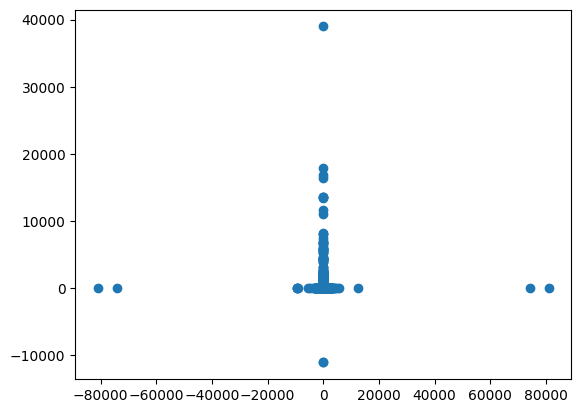

In [5]:
plt.scatter(X_encoded['Quantity'],X_encoded['UnitPrice'])

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from ucimlrepo import fetch_ucirepo

online_retail = fetch_ucirepo(id=352)

X = online_retail.data.features.copy()

# Encode strings to integers
X_encoded = X.apply(LabelEncoder().fit_transform)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_encoded)

outlier_detector = IsolationForest(contamination=0.1)
outliers = outlier_detector.fit_predict(X_scaled)
X_cleaned = X_scaled[outliers == 1]



In [7]:
X_cleaned

array([[0.92777646, 0.46324549, 0.29399372, 0.11172498, 0.92589204,
        0.97297297],
       [0.92967085, 0.46324549, 0.29399372, 0.13996317, 0.92589204,
        0.97297297],
       [0.21619702, 0.46601942, 0.29399372, 0.11663597, 0.92589204,
        0.97297297],
       ...,
       [0.25668956, 0.46879334, 0.40371469, 0.23327195, 0.13426349,
        0.97297297],
       [0.64148709, 0.47156727, 0.40375769, 0.0742787 , 0.06290027,
        0.35135135],
       [0.64219749, 0.47156727, 0.40375769, 0.0742787 , 0.06290027,
        0.35135135]])

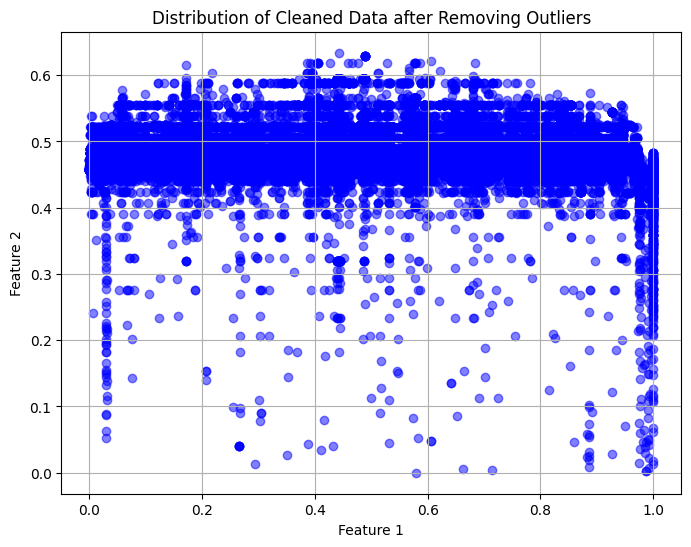

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(X_cleaned[:, 0], X_cleaned[:, 1], color='blue', alpha=0.5)
plt.title('Distribution of Cleaned Data after Removing Outliers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


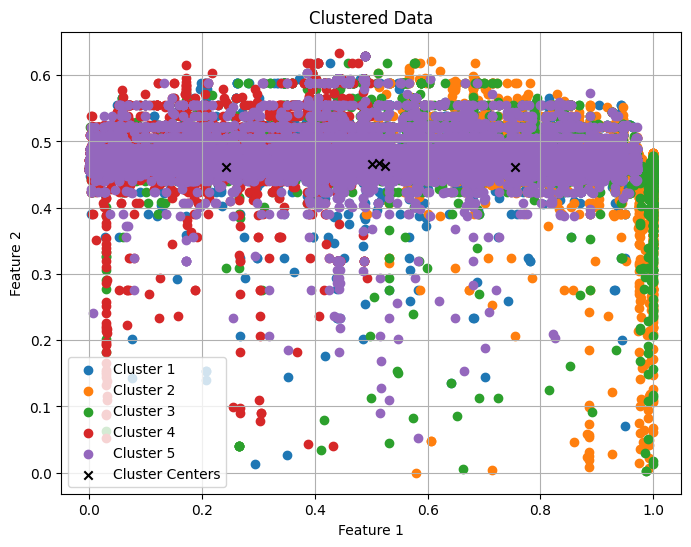

In [9]:
n_clusters = 5

kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X_cleaned)

cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

plt.figure(figsize=(8, 6))
for i in range(n_clusters):
    cluster_data = X_cleaned[cluster_labels == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {i+1}')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], color='black', marker='x', label='Cluster Centers')
plt.title('Clustered Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest
from ucimlrepo import fetch_ucirepo

def k_means(data, n_clusters, max_iter=100):

    centers = np.random.rand(n_clusters, data.shape[1]) 
    outputs = np.zeros(data.shape[0])
    total_centers = []

    for iter in range(max_iter):
        prev_centers = centers.copy()

        for i in range(data.shape[0]):
            distances = np.linalg.norm(data[i,:] - centers, axis=1)
            outputs[i] = np.argmin(distances)  

        for c in range(n_clusters):
            cluster_data = data[outputs == c]
            centers[c] = np.mean(cluster_data, axis=0) if len(cluster_data) > 0 else prev_centers[c]
            total_centers.append(centers[c]) 

        if np.linalg.norm(centers - prev_centers) < 0.01:
            break

    total_centers = np.array(total_centers)
    return centers, outputs, total_centers

online_retail = fetch_ucirepo(id=352)

X = online_retail.data.features.copy()
X_encoded = X.apply(LabelEncoder().fit_transform)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_encoded)
outlier_detector = IsolationForest(contamination=0.1)
outliers = outlier_detector.fit_predict(X_scaled)
X_cleaned = X_scaled[outliers == 1]
n_clusters = 5
centers, outputs, total_centers = k_means(X_cleaned, n_clusters)

plt.figure(figsize=(8, 6))
for i in range(n_clusters):
    cluster_data = X_cleaned[outputs == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {i+1}')
plt.scatter(centers[:, 0], centers[:, 1], color='black', marker='x', label='Cluster Centers')
plt.title('Clustered Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()
